# Note: Please install following libraries before starting this workshop

In [0]:
# !pip install surprise
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

# You are done, You can now delete the first three cells

<h1><center>Recommendation Systems for a Movie Website</center></h1>

<h3>We see the use of recommendation systems all around us. These systems are personalizing our web experience, telling us</h3>

* **What to buy (Amazon)**
* **Which movies to watch (Netflix)**
* **Whom to be friends with (Facebook)**
* **Which songs to listen (Spotify)**

**These recommendation systems leverage our shopping/ watching/ listening patterns and predict what we could like in future based on our behavior patterns.**

<h1>Lets come back to our problem</h1>

# What is the problem?

* **Joe** is a regular visitor of **"xyxmovies.com"**
* He has seen many movies
* Now he spends a lot time in searching
* **He starts loosing his interest**
* He is thinking to shift to another website

<img src = "files/Problem.png" >


## What Recommender Systems do?

What RS do?
* Recommender Systems takes **user interest** into account
* recommend similar movies which that user has not seen

What RS will do in our case?
* Recommender systems of xyzmovies.com will understand what type of movies joe like
* Based on those interests it will recommend him new movies similar to those he likes

### Joe is happy now :)

<img src = "files/Solution.png" >

<font color = "blue"><h2><center>Great! Now you know what recommender systems do.</center></h2></font>


<font color = "black"><h2>What we are going to see?</h2></font>

1. <h3> What are the Types of Recommender Systems?</h3>
2. <h3> Exploring Data for this particular Problem</h3>
3. <h3> Implementing Different Recommender Systems from Scratch</h3>  

<font color = "blue"><h3>Types of recommender systems</h2></font>
1. <h4> Collaborative Recommender System</h4>
2. <h4> Content based Recommender System</h4>
3. <h4> Hybrid Recommender System</h4>

# 1- Collaborative Recommender Systems
It’s the most sort after, most widely implemented and most mature technologies that is available in the market. Collaborative recommender systems aggregate ratings or recommendations of objects, recognize commonalities between the users on the basis of their ratings, and generate new recommendations based on inter-user comparisons. The greatest strength of collaborative techniques is that they are completely independent of any machine-readable representation of the objects being recommended and work well for complex objects where variations in taste are responsible for much of the variation in preferences. Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future and that they will like similar kind of objects as they liked in the past.

<h2> Types of Collaborative Recommender Systems
1. Memory Based
2. Model Based

<font color = "green"><h1>Lets first explore the User Based Collaborative approach of Memory Based Recommender Systems</h1></font>
<h3>Memory-Based Collaborative Filtering:</h3>

Memory-Based Collaborative Filtering approaches can be divided into two main sections: user-item filtering and item-item filtering. A user-item filtering takes a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked. In contrast, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations.
</h3>
* Item-Item Collaborative Filtering: "Users who liked this item also liked …"
* User-Item Collaborative Filtering: "Users who are similar to you also liked …"
</h3>

### Memory Based Collaborative Recommender mainly has two types

1. <h3>User Based Collaborative Filtering</h3>
2. <h3>Item Based Collaborative Filtering</h3>

<h2>User Based Collaborative Filtering</h2>

User Based Collaborative Filtering is a 4 step process
1. You find out the similar users for a user you want to recommend items
2. Generate candidates (Items which similar users has rated)
3. Rank those items
4. Recommend Top N Items

<img src = "files/UBCF.png" >

<font color = "blue"><h2><center>Great! Now you know what are User Based Collaborative Recommendations.</center></h2></font>

## Lets do it from Scratch

In [0]:
from surprise import Dataset
from surprise import Reader
from collections import defaultdict
import pandas as pd
import numpy as np
import re
from surprise import KNNBasic
import heapq
from operator import itemgetter

# Data Analysis

Before we move forward, we should have a detailed look at our Input Data, as we are trying to build recommender systems for a movie website, we should fully understand what data we are going to use. for this workshop we will be using **Movielens Data-set**, which contain data of

1. 9125 Movies
2. 671 Users
3. 100004 ratings

## Lets see our input data

### Defining Our Input Files Path
To explore this data, we need to first load it into our notebook. For this we have to define input paths of where these files are located in our computer. As we have save those file into our local folder so we just have to give names of these files

In [0]:
Movies_Path = r"movies.csv" #path to load movies file
Ratings_Path = r"ratings.csv" #path to load ratings file

## Lets explore first input file, "movies.csv" 
lets load up this file into a pandas data-frame, and see what this movies.csv file contain
lets print out the first 10 rows of this file

In [0]:
df_Movies = pd.read_csv(Movies_Path)
df_Movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## No of distinct Movies (Items) ?
We said that this data-set has 9125 movies. Lets confirm it by counting the number of rows this file has, as each row have information about a distinct movie

In [0]:
print("No of distinct Movies are: "+str(df_Movies.shape[0]))

No of distinct Movies are: 9125


## Lets make our life easier and create some dictionaries to look up movies
as we would want to search a movie name in future by only giving its id.

In [0]:
#Creating Dictionaries Movies_To_ID, ID_To_Movies
Movies_To_ID = {} #Dictionary that saves movie id as key and movie name as value
ID_To_Movies = {} #Dictionary that saves movie name as key and movie id as value

ID_To_Movies = pd.Series(df_Movies.title.tolist(),df_Movies.movieId.tolist()).to_dict()
Movies_To_ID = pd.Series(df_Movies.movieId.tolist(),df_Movies.title.tolist()).to_dict()

## Lets explore 2nd input file, "ratings.csv" 
lets load up this file into a pandas data-frame, and see what this ratings.csv file contain
lets print first 10 rows of this dataset

In [0]:
df_Ratings = pd.read_csv(Ratings_Path)
df_Ratings.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


So the row 0 of this matrix tells that User having id 1 rated a movie with 2.5 having id 31

## Number of distinct ratings?
as we said that we have 100004 ratings of 671 users for 9125 movies

In [0]:
print("Number of distinct user ratings are: "+str(df_Ratings.shape[0]))

Number of distinct user ratings are: 100004


### As we now know that what is the input data, we should define some utility functions that will help us in further steps of doing recommendations

## Utility Functions

### Lets define a function to get a movie name? 

In [0]:
def getMovieName(movieID): #it gets a movie id as input and return its name from the ID_To_Movies dictionary we created above
    if movieID in ID_To_Movies:
        return ID_To_Movies[movieID]
    else:
        return ""

### Testing our utility function for movie id 1

In [0]:
getMovieName(1)

'Toy Story (1995)'

### What are the features of a movie?
as we have to somehow find similar movies in future, so we should know on what basis a movie is similar to another movie.
### Movie Genres, seems to be an accurate feature for finding out similarity between movies

### So lets extract genres of a particular movie?
#### Lets define a function
input to this function is a movie id and it returns all genres this movie belong to in a list

In [0]:
def getMovieGenres(id): #give movie id
    return df_Movies[df_Movies["movieId"] == id].genres.iloc[0].split("|") #spliting genres based on "|"

### Lets test our utility function for movie id 1 (Toy Story (1995))

In [0]:
getMovieGenres(1)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

# We would test our utility functions on user with id 1

### Movies watched by user 1

In [0]:
dfU1 = df_Ratings[df_Ratings["userId"] == 1]
dfU1

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


### Average rating user 1 give to movies

In [0]:
print("Average rating given by User 1: "+str(dfU1.rating.mean()))

Average rating given by User 1: 2.55


### Movies watched by User 1

In [0]:
moviesU1 = dfU1.movieId.tolist()
for i in moviesU1:
    print("Movie Name: "+getMovieName(i))
    print("Movie Genres: "+str(getMovieGenres(i)))

Movie Name: Dangerous Minds (1995)
Movie Genres: ['Drama']
Movie Name: Dumbo (1941)
Movie Genres: ['Animation', 'Children', 'Drama', 'Musical']
Movie Name: Sleepers (1996)
Movie Genres: ['Thriller']
Movie Name: Escape from New York (1981)
Movie Genres: ['Action', 'Adventure', 'Sci-Fi', 'Thriller']
Movie Name: Cinema Paradiso (Nuovo cinema Paradiso) (1989)
Movie Genres: ['Drama']
Movie Name: Deer Hunter, The (1978)
Movie Genres: ['Drama', 'War']
Movie Name: Ben-Hur (1959)
Movie Genres: ['Action', 'Adventure', 'Drama']
Movie Name: Gandhi (1982)
Movie Genres: ['Drama']
Movie Name: Dracula (Bram Stoker's Dracula) (1992)
Movie Genres: ['Fantasy', 'Horror', 'Romance', 'Thriller']
Movie Name: Cape Fear (1991)
Movie Genres: ['Thriller']
Movie Name: Star Trek: The Motion Picture (1979)
Movie Genres: ['Adventure', 'Sci-Fi']
Movie Name: Beavis and Butt-Head Do America (1996)
Movie Genres: ['Adventure', 'Animation', 'Comedy', 'Crime']
Movie Name: French Connection, The (1971)
Movie Genres: ['Actio

# Lets define functions

### Function to get all ratings of a particular user
We input this function a **userId** and it returns, all ratings of this user in a list

In [0]:
def getUserRatings(user): 
    df = df_Ratings[df_Ratings["userId"] == user] #finding ratings from ratings dataframe
    return df.rating.tolist()

### Before testing this utility function lets see all rated movies by user 1

In [0]:
df_Ratings[df_Ratings["userId"] == 1] #finding ratings of user 1

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


### Lets now test out utility function for user 1

In [0]:
print(getUserRatings(1))

[2.5, 3.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.5, 2.0, 2.5, 1.0, 4.0, 4.0, 3.0, 2.0, 2.0, 2.5, 1.0, 3.0]


<font color = "blue"><h2><center>Great! Now we know what is our input data, so now we can move forward towards creating recommendations for a particular user learning his interests</center></h2></font>

## Before moving forward lets recap a little

<img src = "files/UBCF.png" >

## But wait!

## How do you find similar users to a particular user?

#### Lets rethink what data we have?
1. <h4>Movies</h4>
2. <h4>Ratings</h4>

### Lets see our ratings data into a new format
as we have a user item ratings matrix, lets see it in another shape

## We have seen our data into this format

## User - Item - Rating Matrix

<img src = "files/U-I-R.png" >

## This is the same data as above (to find similar users)
We can find similarities using
1. Cosine
2. Pearson
3. Centered Cosine
<img src = "files/I-I.png" >

## Lets now create a User-User Similarity Matrix
<img src = "files/u-u.png" >

<font color = "blue"><h2><center>So now we know how to find similar users</center></h2></font> 

# Development of recommendation systems

## Before moving forward, to compute the similarity matrix for our original data, we should know what libraries are we going to use for this purpose

We will use a library called Surprise to build a simple collaborative filtering recommendation system

## Scikit_Surprise
Surprise is a Python scikit for building and analyzing recommender systems.

## Surprise uses its own Dataset object, So we have to load our user item rating matrix into surprise's data-set

In [0]:
## Reader specify in which format we have to pick our data, 
## like in the ratings file we have userid, movieid, rating and timestamp separated by ","
## we pass that reader to dataset function and pass the file path

reader = Reader(line_format="user item rating timestamp",sep = ",",skip_lines=1)
Data = Dataset.load_from_file(Ratings_Path,reader) 

print("Now Data has the user item rating matrix :)")

Now Data has the user item rating matrix :)


# From now onwards, we will be focusing more on code

# Collaborative Filtering

# 1- User Based Collaborative Filtering

# Generating User to User Similarity Matrix using Cosine Similarity

To find out the User-User Similarity matrix, we can use KNNBasic model, this model take user item rating matrix as input and generate both similarity matrices (User-User and Item-Item similarity matrix). To find out similarity between two users, you can use following similarity methods

* Cosine
* Pearson


Before we start with the KNNBasic code to generate ** Similarity Matrices ** we should clearly understand its input which are
* sim_option: it tells, which similarity method to use i.e. Cosine, Pearson etc. and the second option is whether you want to generate user-to-user similarity matrix or item-to-item similarity matrix
* User - Item - Rating matrix

In [0]:
TrainSetKNN = Data.build_full_trainset() #Surprise build the given dataset, i.e rows are users and columns are movies, 
                                         #we have seen this form in a diagram above

sim_options = {'name': 'cosine','user_based': True} # setting similarity options
model = KNNBasic(sim_options=sim_options) # loading our model
model.fit(TrainSetKNN) # training our model onto our training data
simsMatrix = model.compute_similarities() #saving the similarity matrix

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


## Lets see what this similarity matrix contain?

In [0]:
simsMatrix

array([[1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.95561425, ..., 0.776114  , 0.89144204,
        0.97993672],
       [0.        , 0.95561425, 1.        , ..., 0.99786069, 0.94592126,
        0.98448284],
       ...,
       [1.        , 0.776114  , 0.99786069, ..., 1.        , 1.        ,
        0.9952275 ],
       [0.        , 0.89144204, 0.94592126, ..., 1.        , 1.        ,
        0.96183401],
       [1.        , 0.97993672, 0.98448284, ..., 0.9952275 , 0.96183401,
        1.        ]])

## Did you get this similarity matrix?

### if not, lets recall that (User-User Similarity Matrix) visual diagram
<img src = "files/u-u.png" >

## Lets get back to our generated similarity matrix
### So the first row of this matrix shows the similarity score of user 1 with all other 671 user
### As we said that we have 671 users in our dataset, so 671 x 671 similarity score?
Lets confirm this

In [0]:
print("No of rows: "+str(len(simsMatrix)))

No of rows: 671


In [0]:
print("No of columns: "+str(len(simsMatrix[0])))

No of columns: 671


# So the similarity matrix is ready, lets now apply user based collaborative filtering

# Remember the 4 Step process?

<img src = "files/UBCF.png" >

#  1- Finding out similar users
## Lets take a user and find its similarity with all users from, similarity matrix
please note that
* "User" saves the user id you want to recommend
* "k" is the number of top similar user you wan to extract

In [0]:
User = '1' # Save your user id here
k = 5 #Select the no of top n recommendation

UserInnerID = TrainSetKNN.to_inner_uid(User) #it converts the userid to inner user id in dataset
similarityRow = simsMatrix[UserInnerID] # finding out the similarity score of User with all 671 users

# Generating Top 10 Similar Users
we will now sort the similarity row, and take the top k users, where k is defined above

In [0]:
similarUsers = [] # a list that saves all similar users of our targeted users in the form (innerID, score)
                  # Where innerid is the similar user's id and score is the similarity score
for innerID, score in enumerate(similarityRow):
    if (innerID != UserInnerID):
        similarUsers.append( (innerID, score) ) # appending similar users

kNeighbors = heapq.nlargest(k, similarUsers, key=lambda t: t[1]) # taking out k top similar users, which you can say top k neighbours 

print(kNeighbors)

[(4, 1.0), (8, 1.0), (19, 1.0), (24, 1.0), (25, 1.0)]


In [0]:
sudf = pd.DataFrame(kNeighbors,columns=["Similar User Id","Similarity Score"])
sudf

,Similar User Id,Similarity Score
0,4,1.0
1,8,1.0
2,19,1.0
3,24,1.0
4,25,1.0


# We are done with the first step, lets move to step 2
<img src = "files/UBCF1.png" >

# 2- Generating Candidates
What are our candidates?
* Candidates are the movies watched by similar users
But how this process will go?

* 1- we will take all the top similar users and find all the movies watched by a similar user
* 2- we will normalize a candidate movie score by this formula (Normalization will be done on the basis of candidate rating and how similar this user was with the original user)
<img src = "files/Formula.png" >
* 3- We will the sort all these candidates based on the normalized score

In [0]:
#generating candidates for a user for all similar users and normalize them with users similarity score

Candidates = defaultdict(float) #Dictionary that contain the candidates i.e. movie id with its normalized score
for SimilarUser in kNeighbors: #for each similar user (which are k, we will do the following steps)
    ID_ = SimilarUser[0] #Storing the similar user id
    SimScore = SimilarUser[1] #Storing the similar user Similarity score with the original user we want to recommend movies
    SimUser_RatedMovies = TrainSetKNN.ur[ID_] #taking out all the rated movies by similar user i.e. candidates
    for rating_ in SimUser_RatedMovies: #for all similar movies, we will do following
        if(rating_[1] >= 3.0): #we would only score a candidate if its rating is above 3, because we assume if the user has rated above 3 he likes that movie
            Candidates[rating_[0]] += (rating_[1]/5.0) * SimScore #assigning candidate movie the normalized score

## Lets see the first 10 generated candidates in a data-frame

In [0]:
pd.DataFrame(list(Candidates.items()),columns=["Movie Id","Normalized Score"]).head(10)

#for i in range(0,10):
#    print(list(Candidates.items())[i])

,Movie Id,Normalized Score
0,319,1.4
1,22,0.8
2,320,1.6
3,141,0.8
4,29,1.4
5,321,0.7
6,322,0.9
7,323,0.7
8,57,1.7
9,59,1.5


# As we have generated all candidates, lets move to step 3
<img src = "files/UBCF2.png" >


# 3- Candidate Ranking
before ranking those candidates, we should remove all movies that a user has already watched

In [0]:
# Movies user has already rated
watched = {} #watched has all movies already watched by that user
for itemID, rating in TrainSetKNN.ur[UserInnerID]: # we take all movies which are already rated by that user 
    watched[itemID] = 1 # we set its id to 1

#Sorting movies
Sorted_SimMovie = sorted(Candidates.items(), key=itemgetter(1), reverse=True)

# Now we have ranked candidates list, Lets move to step 4
<img src = "files/UBCF3.png" >

# 4- Recommending Items to user

* N is the no of items

In [0]:
print("Recommended Itms for User "+str(User)+"\n")

# Get top-rated items from similar users:
N = 10 #No of recommended items

pos = 0 #if an item is recommended, we increment it
for item, rating in Sorted_SimMovie: #for every movie in sorted candidates list
    if not item in watched: #making sure user has not already watched it
        movieID = TrainSetKNN.to_raw_iid(item) #getting the movie id
#        print(movieID)
        print(getMovieName(int(movieID))) #printing movie names
        pos += 1 
        if (pos > N-1): #checking if we have recommended top n recommendations, if yes, we break the loop
            break

Recommended Itms for User 1

Matrix, The (1999)
Toy Story (1995)
Shawshank Redemption, The (1994)
Independence Day (a.k.a. ID4) (1996)
Fargo (1996)
Sixth Sense, The (1999)
As Good as It Gets (1997)
Pretty Woman (1990)
Truman Show, The (1998)
Much Ado About Nothing (1993)


<font color = "blue"><h1><center>Congratulations! You have successfully build your first User Based Collaborative Recommender System </center></h1></font>
<img src = "files/UBCF4.png" >


# 2- Item Based Collaborative Filtering, what are the steps?

1. <h3>Select top liked items (Top rated movies) of a user you want to recommend</h3>
2. <h3>Find similar movies for the liked movies (Candidates)</h3>
3. <h3>Rank Candidates (Movies)</h3>
4. <h3>Recommend Movies</h3>
<img src = "IBCF.png" >

<h1><font color = "green"> We have covered everything for Item Based CF, we just need a little trick and everything is ready</font><h1>

<h2><font color = "green">Lets take transpose of our User-Item-Rating Matrix and find similarity between items (Movies)</font><h3>
We can find similarity using
* Cosine
* Pearson
* Centered Cosine
<img src = "files/Item-User-Rating.png" >

## Find Item to Item Similarity Matrix
<img src = "files/Item-Item.png" >

# Computing Item to Item Similarity Matrix using Cosine Similarity
To find out the Item-Item Similarity matrix, we can use KNNBasic model as used before, this model take user item rating matrix as input and generate both similarity matrices (User-User and Item-Item similarity matrix). To find out similarity between two items (movies), you can use following similarity methods

* Cosine
* Pearson


Before we start with the KNNBasic code to generate ** Similarity Matrices ** we should clearly understand its input which are
* sim_option: it tells, which similarity method to use i.e. Cosine, Pearson etc. and the second option is whether you want to generate user-to-user similarity matrix or item-to-item similarity matrix, we should set user_based option to false so that it generate Item-Item similarity matrix
* User - Item - Rating matrix

In [0]:
sim_options = {'name': 'cosine','user_based': False} # setting similarity options
model_IICF = KNNBasic(sim_options=sim_options) # loading our model
model_IICF.fit(TrainSetKNN) # training our model onto our training data
simsMatrix_IICF = model_IICF.compute_similarities() #saving the similarity matrix

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


## Lets see what this similarity matrix contain?

In [0]:
simsMatrix_IICF

array([[1.        , 0.94740842, 0.9619885 , ..., 0.        , 0.        ,
        0.        ],
       [0.94740842, 1.        , 0.92847669, ..., 1.        , 1.        ,
        0.        ],
       [0.9619885 , 0.92847669, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Did you get this similarity matrix?

### You should, if not, lets recall that (Item-Item Similarity Matrix) visual diagram
<img src = "files/Item-Item.png" >

## Lets get back to our generated similarity matrix
### So the first row of this matrix shows the similarity score of movie 1 with all other movies
### As we said that we have 9125 movies in our dataset, so 9125 x 9125 similarity scores?
Lets confirm this

In [0]:
print("No of rows: "+str(len(simsMatrix_IICF)))

No of rows: 9066


In [0]:
print("No of columns: "+str(len(simsMatrix_IICF[0])))

No of columns: 9066


# Why its size is 9066 X 9066 instead of 9125 X 9125
# Because 9125-9066 = 59 movies had 0 ratings

#  1- Finding out top rated movies by a user
## Lets take a user and find its top rated movies
please note that
* "User" saves the user id you want to recommend
* "k" is the number of top rated movies of that user

In [0]:
User = '1' #User Id of test user
k = 10 #No of Top rated movies of test user 

testUserInnerID = TrainSetKNN.to_inner_uid(User) #Inner Id of our test user in Dataset

# Get the top K items (movies) this user rated rated
testUserRatings = TrainSetKNN.ur[testUserInnerID] #finding out all the ratings of a that test user 
kNeighbors = heapq.nlargest(k, testUserRatings, key=lambda t: t[1]) #Sorting those ratings, and picking up top k (These are neighbours)

## Now we have top rated movies, lets movie to step 2

<h2> 2- Find similar movies for the liked movies (Candidates)
<h4> 
* For every top rated movie, we would take all similar movies (Which are candidates)
* We then normalize the candidate scores as we did before

<img src = "files/Formula2.png" >

In [0]:
# Get similar items to stuff we liked (weighted by rating)
candidates = defaultdict(float) #Dictionary that contain the candidates i.e. movie id with its normalized score
for itemID, rating in kNeighbors: #ItemId is the Top Rated Movie's Id of test user, rating is the rating given to that movie
    similarityRow = simsMatrix_IICF[itemID] #similarity of that movie with all other movies
    for innerID, score in enumerate(similarityRow): #for all similar movies
        candidates[innerID] += score * (rating / 5.0) #we are finding the normalized score

## Lets exclude all the movies, test user has already watched

In [0]:
# Build a dictionary of stuff the user has already seen
watched = {} #Watched contain all the movies, user has already watched
for itemID, rating in TrainSetKNN.ur[testUserInnerID]: #finding out all the movies user already have watched
    watched[itemID] = 1 #setting the value of watched movie to 1

# We have normalized the candidate scores
<h3>
Lets move to step 3
<h1>
3- Rank those candidates</h1>
we are sorting those candidates based on their score

In [0]:
ranked_candidates = sorted(candidates.items(), key=itemgetter(1), reverse=True)

# Lets move to step 4
<h1>
4- Generate Candidates

In [0]:
# Get top-rated items from similar users:
print("Recommended Itms for User "+str(User)+"\n")
TopN = 10 #No of recommended items
pos = 0 #if an item is recommended, we increment it
for itemID, ratingSum in ranked_candidates: #for every movie in sorted candidates list
    if not itemID in watched: #making sure user has not already watched it
        movieID = TrainSetKNN.to_raw_iid(itemID) #getting the movie id
#        print(ml.getMovieName(int(movieID)), ratingSum)
        print(getMovieName(int(movieID))) #printing movie names
        pos += 1
        if (pos > TopN-1): #checking if we have recommended top n recommendations, if yes, we break the loop
            break

Recommended Itms for User 1

Competition, The (1980)
Melancholia (2011)
After the Sunset (2004)
Come See the Paradise (1990)
Safe Passage (1994)
Good Mother, The (1988)
Unstrung Heroes (1995)
Shaft (1971)
Picnic (1955)
Drag Me to Hell (2009)


<font color = "blue"><h1><center>Congratulations! You have successfully build your first Item Based Collaborative Recommender System </center></h1></font>

<font color = "Green"><h1>Lets Now move towards Model Based Recommender System </h1></font>

<h2>
Model based approach</h2>
<h4>In this approach, CF models are developed using machine learning algorithms to predict user’s rating of unrated items. lets explore some novel techniques of model based RS </h4>

* <h3>Matrix Factorization (SVD)</h3>
* <h3>Non Negative Matrix Factorization</h3>
* <h3>Probabilistic Matrix Factorization</h3>
* <h3>Multi Layer Neural Networks</h3>


<h2> Before we go further lets see some evaluation techniques for Recommender Systems</h2>
1. <h3>RMSE</h3>
2. <h3>Hit Rate</h3>
3. <h3>Average Reciprocal Hit Rate</h3>
4. <h3>Diversity</h3>
5. <h3>Novelty</h3>

## RMSE
<img src = "RMSE.png" >

# Hit Rate:
<img src = "HR.png" >

# Average Reciprocal Rank:
<img src = "ARHR.png" >

# Diversity:
Diversity takes into account how diverse those items are, if your recommendations are diverse and are not specific to user needs, recommender system should be penalized.

# Novelty
Novelty determines that whether popular items are being recommended or not, we don't want our Recommender Systems to just recommend items which a user like, so we should also recommend some popular items to that user

<font color = "blue"><h1>Today, we would only be focusing on one evaluation technique which is RMSE</h1></font>

Before we move forward we would finalize the following concepts
What we do in recommender systems
* We predict rating of unseen items for a user
* We sort those items based on their ratings
* We recommend the top rated unseen items

# Lets divide our data into Training set and Test Set
We would divide out user item rating matrix into two sets
* Training Set (Contains every user's 80% rated movies)
* Test Set (Contains every user's 20% rated movies)

# Train Test Functions
To divide our data into training and test sets, we would use the surprise built-in method, train_test_split

**Importing required library**

In [0]:
from surprise.model_selection import train_test_split
#from surprise.model_selection import LeaveOneOut

**Dividing our original data (User-Item-Rating Matrix) into train-set and test-set**

In [0]:
Train_Set, Test_Set = train_test_split(Data, test_size = .20 , random_state=1) #dividing our Data into train and test sets
                                                                               #and saving them into Train_Set and Test_Set
def getFullTrainSet(data):
    return data.build_full_trainset() #function when called, return the full_train_set,
                                      #input to this function is a User_Item_rating matric 
    
def getTrainSet(): #function that return already build Training set
    return Train_Set

def getTestSet(): #function that return already build Test set
    return Test_Set

def getAntiTestSet(data): #function that returns Anti Test Set of given User-Item-Rating Matrix
    return data.build_anti_testset()

# Lets move towards our first Model Based Algorithm

# Matrix Factorization:

* Attitudes or preferences of a user can be determined by a small number of hidden factors called Embeddings
* Matrix decomposition can be reformulated as an optimization problem with loss functions and constraints
* Now the constraints are chosen based on property of our model.

<img src = "SVD.png" >

<h4>Embeddings:</h4>
Intuitively, we can understand embeddings as low dimensional hidden factors for items and users. For e.g. say we have 5 dimensional (i.e. D or n_factors = 5 in above figure) embeddings for both items and users (# 5 chosen randomly). Then for user-X & movie-A, we can say the those 5 numbers might represent 5 different characteristics about the movie, like 

* (i) how much movie-A is sci-fi intense 
* (ii) how recent is the movie 
* (iii) how much special effects are in movie A 
* (iv) how dialogue driven is the movie 
* (v) how CGI driven is the movie. Likewise, 

5 numbers in user embedding matrix might represent, 

* (i) how much does user-X like sci-fi movie 
* (ii) how much does user-X like recent movies …and so on. 

In above figure, a higher number from dot product of user-X and movie-A matrix means that movie-A is a good recommendation for user-X.

(we are not saying these numbers actually represent such information. We don’t actually know what these factors mean. This is just to build an intuition)

# Matrix Factorization (SVD) using Surprise

**Importing required libraries**

In [0]:
from surprise import SVD
from surprise import accuracy

**Picking up SVD model and training it on our train-set**

In [0]:
MF_SVD_Algo = SVD()
MF_SVD_Algo.fit(Train_Set) #traning on our train_set

** Saving predictions for test-set **

In [0]:
MF_SVD_Predictions = MF_SVD_Algo.test(Test_Set)

** Prediction Example **

In [0]:
MF_SVD_Predictions[0]

Prediction(uid='268', iid='1220', r_ui=3.0, est=3.367285745114758, details={'was_impossible': False})

**Lets see the results**

In [0]:
print("SVD Results")
RMSESVD = accuracy.rmse(MF_SVD_Predictions,verbose=True)

SVD Results
RMSE: 0.8998


# Non Negative Matrix Factorization

** The same goes for Non Negative Matrix Factorization**

In [0]:
from surprise import NMF
model = NMF()
model.fit(Train_Set)
pred = model.test(Test_Set)
RMSENMF = accuracy.rmse(pred,verbose=True)

RMSE: 0.9429


# SVD Tuning

In [0]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [20, 30], 'lr_all': [0.005, 0.010],'n_factors': [50, 100]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(Data)
# best RMSE score
print("Best RMSE score attained: ", gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Best RMSE score attained:  0.8979018989554733
{'n_epochs': 20, 'lr_all': 0.005, 'n_factors': 50}


# User Based KNN

In [0]:
sim_options = {'name': 'msd','user_based': True}
model = KNNBasic(sim_options=sim_options)
model.fit(Train_Set)
pred = model.test(Test_Set)
UBKNNRMSE = accuracy.rmse(pred,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9614


# Content Based KNN

In [0]:
sim_options = {'name': 'msd','user_based': False}
model = KNNBasic(sim_options=sim_options)
model.fit(Train_Set)
pred = model.test(Test_Set)
CBKNNRMSE = accuracy.rmse(pred,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9434


# Comparision of RMSE score for different RS techniques

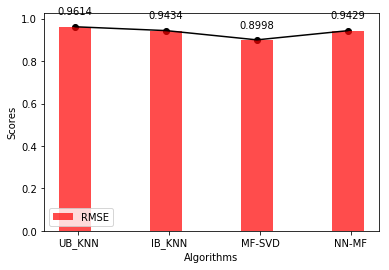

In [0]:
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4

Rmse = (UBKNNRMSE, CBKNNRMSE, RMSESVD, RMSENMF) 

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.7
 
rects1 = plt.bar(index, Rmse, bar_width,alpha=opacity,color='r',label='RMSE')

plt.scatter(index, Rmse,color='k')
plt.plot(index,Rmse,color='k')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.xticks(index + bar_width/10, ('UB_KNN','IB_KNN','MF-SVD','NN-MF'))
plt.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%.4f' %(height),ha='center', va='bottom')

autolabel(rects1)
plt.savefig('Model_Results.png')
plt.show()